In this module, we study how to implement principal component analysis (PCA) in Python. PCA is a type of unsupervised learning algorithm which is used in dimensionality reduction tasks. In simple words, principal component analysis is a method of extracting important variables (in form of components) from a large set of variables available in a data set. It extracts low dimensional set of features from a high dimensional data set with a motive to capture as much information as possible. With fewer variables, visualization also becomes much more meaningful. PCA is more useful when dealing with 3 or higher dimensional data. PCA is sometimes referred to as **generalized factor analysis**. Recall that factor analysis determines several orthogonal lines of best fit to the data. Here in PCA, we are essentially using fewer (constructed) variables of the datasets, each of which are uncorrelated with each other, to explain all the variations of the data. 

Before we jump into the code, let's discuss the theory a little more in detail in the next section. We will work with a cancer dataset in this lecture to illustrate the use of PCA. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
os.chdir("C:\\Users\\pgao\\Documents\\PGZ Documents\\Programming Workshop\\PYTHON\\Open Courses on Python\\Udemy Course on Python\Introduction to Data Science Using Python\\datasets")

Let's briefly go over the math behind PCA. Let’s say we have a data matrix $X$ of dimension n=300 by K=50. Here, n represents the number of observations and K represents number of predictors. Since we have a large K = 50, there can be 0.5K(K-1) scatter plots (i.e more than 1000 plots possible to analyze the variable relationship). In this case, it would be a lucid approach to select a subset of K predictor which captures as much information as possible. Followed by plotting the observation in the resultant low dimensional space. A **principal component** is a normalized linear combination of the original predictors in a data set.

A generic principal component can be written as $y=a_1x_1+a_2x_2+...+a_Kx_K$. Here, the parameter vector $a=(a_1,a_2,...)$ is called the **loading vector** of the component. The loadings are constrained to a sum of square equals to 1. This is because large magnitude of loadings may lead to large variance. If $y$ is the first component, it also defines the direction of the principal component along which data varies the most. It results in a line in K dimensional space which is closest to the n observations. Closeness is measured using average squared euclidean distance. On the other hand, the vector $x$ are normalized predictors from the original vectors. Normalized predictors have mean equals to zero and standard deviation equals to one.

First principal component is a linear combination of original predictor variables which captures the maximum variance in the data set. It determines the direction of highest variability in the data. The larger the variability captured in first component, the larger the information captured by component. No other component can have variability higher than first principal component. The first principal component results in a line which is closest to the data i.e. it minimizes the sum of squared distance between a data point and the line. Similarly, we can compute the second principal component also. The second component is also a linear combination of original predictors which captures the remaining variance in the data set and is uncorrelated with the first component. All succeeding principal component follows a similar concept i.e. they capture the remaining variation without being correlated with the previous component:

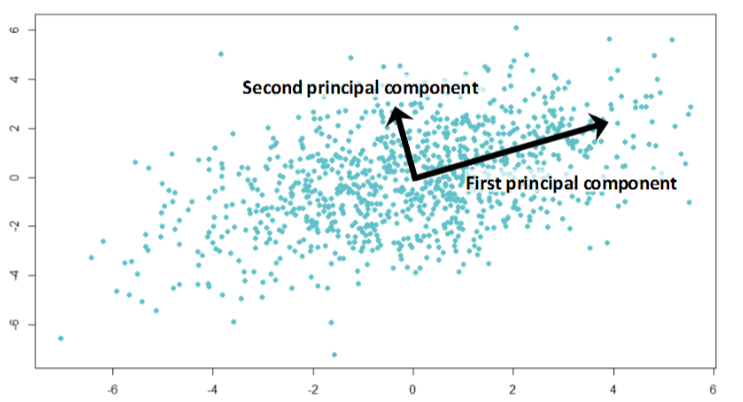

In [3]:
from IPython.display import Image
Image("PCA.PNG") 

The principal components are supplied with normalized version of original predictors. This is because, the original predictors may have different scales. For example: Imagine a data set with variables’ measuring units as gallons, kilometers, light years etc. It is definite that the scale of variances in these variables will be large. Performing PCA on un-normalized variables will lead to insanely large loadings for variables with high variance. In turn, this will lead to dependence of a principal component on the variable with high variance, which is undesirable.

Now let's work on our empirical example. Notice that after loading the data, we first need to transform it into a 'DataFrame' object:

In [4]:
cancer = load_breast_cancer()
print(type(cancer))

<class 'sklearn.utils.Bunch'>


Notice that the object 'cancer' is a class object here ('sklearn.util.Bunch'). This is not a common object type but it is very similar to a dictionary object:

In [5]:
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


Let's look at the description of the dataset:

In [6]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Now let's clean up and build the dataset. We can see that the dataset is all numeric, so we can employ PCA later (our goal is to pick the first 2 principal components to explain the majority of the data variations).  

In [7]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now let's normalize the data. The package for PCA in Python uses a very similar process to other preprocessing functions that come with the 'scikitlearn' package. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform(). We can also specify how many components we want to keep when creating the PCA object.

In [8]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

Now let's do the PCA analysis officially:

In [9]:
pca = PCA(n_components=3) # keeping 3 principal components
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Now we can transform this data to its first 3 principal components. So now we have reduced the 30 dimensions to 3 dimensions only. We will plot the two of the three components as well later, and we will see that clearly by using these 3 components we can easily separate these two classes:

In [10]:
t_pca = pca.transform(scaled_data)
print(type(t_pca))
print('original dataset dimensions:', scaled_data.shape)
print('transformed dataset dimensions after PCA:', t_pca.shape)

<class 'numpy.ndarray'>
original dataset dimensions: (569, 30)
transformed dataset dimensions after PCA: (569, 3)


We have transformed the original datset with 30 variables into a dataset of 3 variables while maintaining the same number of records (569 in this example). Now let's look at the dataset graphically:

Text(0,0.5,'Second Principal Component')

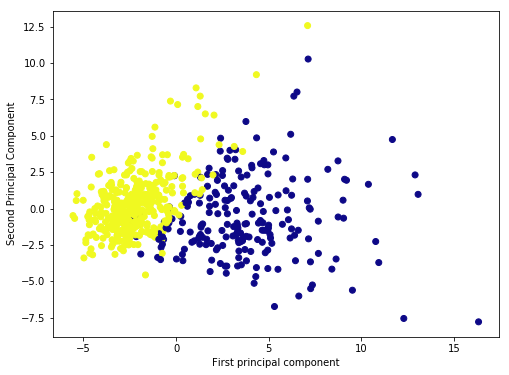

In [11]:
plt.figure(figsize=(8,6)) 
plt.scatter(t_pca[:,0],t_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Now comes the hard part-interpretation. Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent. The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object. In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [12]:
pca.components_ # principal axes in feature space, representing the directions of maximum variance in the data

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611303,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359318,  0.09796411, -0.00825724,  0.14188335,  0.27533947],
       [-0.00853127,  0.0645499 , -0.00931424,  0.02869952, -0.10429206,
        -0.07409159,  0.00273388, -0.02556346, -0

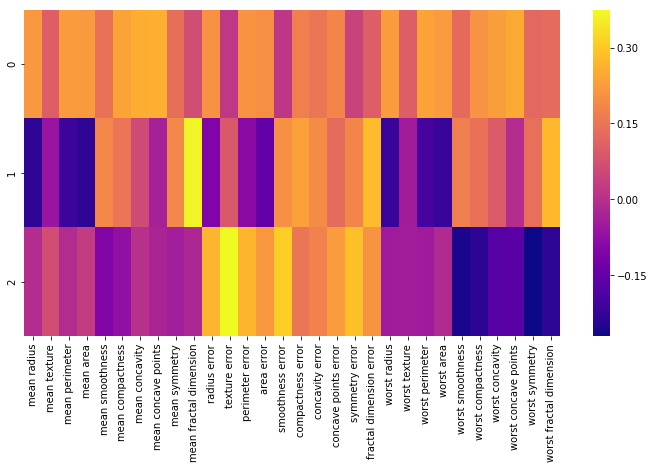

In [13]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

This heatmap and the color bar basically represent the correlation between the various features and the principal component itself. Hotter color represents more correlation with specific features. 

If we want to see the amount of variance that each PC explains, we can do the following. Below it says the first PC explains 44% of the variations, the second explains roughly 18% and the third explains 9:

In [14]:
var= pca.explained_variance_ratio_
var # percentage of variance explained by each of the selected components.

array([0.44272026, 0.18971182, 0.09393163])

PCA can be used for a variety of settings, including data preprocessing for many supervised learning algorithms and clustering for the sake of dimensionatliy reduction, as long as we do not care too much about the interpretation of each PC. Details can be found in the Python online documentation. 

Additional References:
   - https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/
   - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
   - https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/